In [ ]:
import torch

In [2]:
def init_emb_by_feature(trainMatrix, name=None):
    user_feat, item_feat = None, None
    if os.path.exists(f'/Users/edisonchen/Desktop/graph/saved/init_embedding/{name}/user_feat.pt'):
        user_feat = torch.load(f'/Users/edisonchen/Desktop/graph/saved/init_embedding/{name}/user_feat.pt')
    if os.path.exists(f'/Users/edisonchen/Desktop/graph/saved/init_embedding/{name}/item_feat.pt'):
        item_feat = torch.load(f'/Users/edisonchen/Desktop/graph/saved/init_embedding/{name}/item_feat.pt')
    if user_feat is not None and item_feat is not None:
        return user_feat, item_feat
    feat = Feature(trainMatrix)
    user_feat, item_feat = [], []

    for user in tqdm(range(trainMatrix.shape[0])):
        user_feat.append(feat.get_feature(user))
    user_feat = torch.tensor(user_feat, dtype=torch.float)
    torch.save(user_feat, f'/Users/edisonchen/Desktop/graph/saved/init_embedding/{name}/user_feat.pt')

    feat = Feature(trainMatrix.T)

    for item in tqdm(range(trainMatrix.shape[1])):
        item_feat.append(feat.get_feature(item))
    item_feat = torch.tensor(item_feat, dtype=torch.float)
    torch.save(item_feat, f'/Users/edisonchen/Desktop/graph/saved/init_embedding/{name}/item_feat.pt')
    return user_feat, item_feat


name = 'delicious'
datapath = f'/Users/edisonchen/Desktop/graph/data/{name}/raw/{name}.csv'
dataset = Data(path_train=datapath)
train_df, n_users, n_items = dataset.load_file_as_dataFrame()
matrix, _ = dataset.dataFrame_to_matrix(train_df, n_users, n_items)
trainMatrix = matrix.toarray()
user_feat, item_feat = init_emb_by_feature(trainMatrix, name=name)

----- calculating user/item faetures -----
saving to /Users/edisonchen/Desktop/graph/saved/init_embedding/delicious/


<AxesSubplot: >

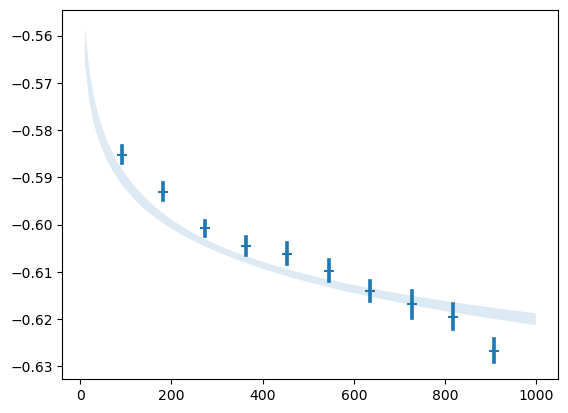

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

losses = np.load('losses.npy', allow_pickle=True)
sns.regplot(x=np.arange(len(losses)), y=losses, marker='+', logx=True, truncate=True, x_bins=10)

In [17]:
all_edges = np.load('edges.npy', allow_pickle=True)
edges = all_edges[-1]
edges

array([[0., 5., 0., ..., 5., 0., 0.]], dtype=float32)

In [12]:
import math
def performance(ratings, trainMatrix, target, topk):
    if isinstance(ratings, torch.Tensor):
        ratings = ratings.detach().cpu().numpy()
    if isinstance(trainMatrix, torch.Tensor):
        trainMatrix = trainMatrix.detach().cpu().numpy()

    mask = trainMatrix != 0
    ratings[mask] = -np.inf
    hc, nc = 0, 0
    for i in range(trainMatrix.shape[0]):
        idx = np.argsort(ratings[i])[::-1][:topk]
        hc += target in idx
        nc += math.log(2) / math.log(np.where(idx == target)[0] + 2) if target in idx else 0
    hr = hc / trainMatrix.shape[0]
    ndcg = nc / trainMatrix.shape[0]
    return hr, ndcg


In [14]:
from IHVP import SVD, train_svd
from data_pre import trainMatrix, user_item
import torch
import numpy as np

target = 0

trainMatrix = np.concatenate([trainMatrix, edges], 0)
recommender = SVD(trainMatrix, feat_dim=128)
optimizer = torch.optim.SGD(recommender.parameters(), lr=1e-2, momentum=0.9, weight_decay=1e-5) 
ratings, _ = train_svd(user_item, recommender, optimizer)
print(performance(ratings, trainMatrix, target, 10))
del recommender
del optimizer
del trainMatrix


print('retrain')
from data_pre import trainMatrix
recommender = SVD(trainMatrix, feat_dim=128)
optimizer = torch.optim.SGD(recommender.parameters(), lr=1e-2, momentum=0.9, weight_decay=1e-5) 
ratings, _ = train_svd(user_item, recommender, optimizer)
print(performance(ratings, trainMatrix, target, 10))
del recommender
del optimizer

100%|██████████| 774/774 [00:00<00:00, 1100.19it/s]


(0.8812301166489925, 0.6683402379526497)
retrain


100%|██████████| 774/774 [00:00<00:00, 1115.54it/s]


(0.8802966101694916, 0.6499939295580726)


In [41]:
hrs[new_target]

0.8822905620360552

In [2]:
import matplotlib.colors as mcolors

mcolors.CSS4_COLORS.keys()

dict_keys(['aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black', 'blanchedalmond', 'blue', 'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'cyan', 'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgreen', 'darkgrey', 'darkkhaki', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred', 'darksalmon', 'darkseagreen', 'darkslateblue', 'darkslategray', 'darkslategrey', 'darkturquoise', 'darkviolet', 'deeppink', 'deepskyblue', 'dimgray', 'dimgrey', 'dodgerblue', 'firebrick', 'floralwhite', 'forestgreen', 'fuchsia', 'gainsboro', 'ghostwhite', 'gold', 'goldenrod', 'gray', 'green', 'greenyellow', 'grey', 'honeydew', 'hotpink', 'indianred', 'indigo', 'ivory', 'khaki', 'lavender', 'lavenderblush', 'lawngreen', 'lemonchiffon', 'lightblue', 'lightcoral', 'lightcyan', 'lightgoldenrodyellow', 'lightgray', 'lightgreen', 'lightgrey', 'lightpink', 'lightsalmon', 'lights

In [20]:
import torch

# 创建一个二维张量
input_tensor = torch.randint(0, 6, (6, 6))

# 按照0-5的范围划分成5个二维张量
sub_tensors = []
for i in range(6):
    mask = (input_tensor == i)
    sub_tensors.append(mask.int() * i)

# 合并为一个三维张量
output_tensor = (torch.stack(sub_tensors, dim=0))

output_tensor

tensor([[[0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0]],

        [[0, 0, 0, 0, 1, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 1, 0, 0, 0, 0],
         [0, 0, 0, 0, 1, 0],
         [0, 0, 0, 0, 0, 0]],

        [[0, 2, 0, 0, 0, 0],
         [0, 0, 0, 0, 2, 0],
         [2, 0, 2, 0, 0, 0],
         [2, 0, 0, 0, 2, 2],
         [0, 2, 0, 0, 0, 0],
         [2, 2, 0, 2, 0, 0]],

        [[3, 0, 0, 0, 0, 0],
         [0, 0, 3, 3, 0, 0],
         [0, 3, 0, 0, 3, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 3, 0, 0, 0],
         [0, 0, 0, 0, 0, 0]],

        [[0, 0, 0, 0, 0, 0],
         [4, 0, 0, 0, 0, 4],
         [0, 0, 0, 0, 0, 4],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 4, 4]],

        [[0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 5, 5, 0, 0],
    